<a href="https://colab.research.google.com/github/Ramyanee/cats-dogs/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-06-07 19:34:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   119MB/s    in 0.5s    

2021-06-07 19:34:18 (119 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [32]:
import tensorflow as tf

In [19]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [20]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [21]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.209.jpg', 'cat.245.jpg', 'cat.78.jpg', 'cat.654.jpg', 'cat.61.jpg', 'cat.202.jpg', 'cat.964.jpg', 'cat.286.jpg', 'cat.541.jpg', 'cat.234.jpg']
['dog.113.jpg', 'dog.497.jpg', 'dog.125.jpg', 'dog.654.jpg', 'dog.40.jpg', 'dog.805.jpg', 'dog.490.jpg', 'dog.892.jpg', 'dog.499.jpg', 'dog.10.jpg']


In [22]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [23]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

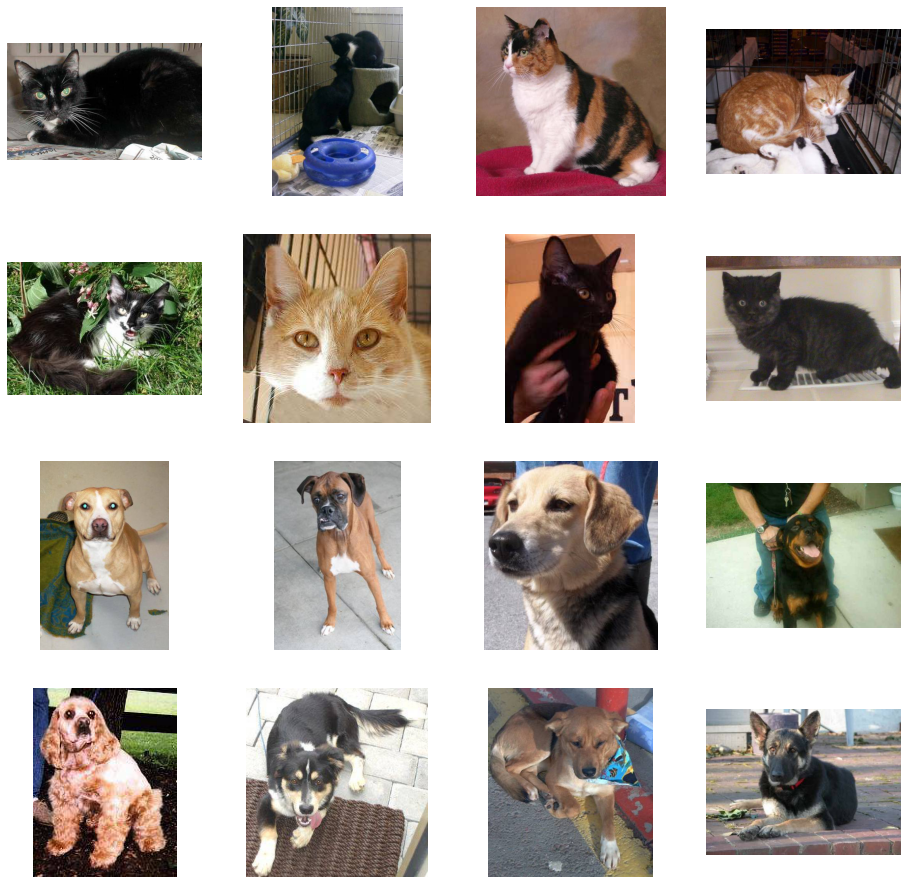

In [24]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)


validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
from tensorflow.keras.optimizers import RMSprop

In [27]:
def create_model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (150,150,3)),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')

  ])

  

  return model

In [28]:
model = create_model()

In [29]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=0.001),
                metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
history =  model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data = validation_generator,
    validation_steps=50,
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 38s - loss: 0.8029 - acc: 0.5655 - val_loss: 0.6423 - val_acc: 0.6420
Epoch 2/15
100/100 - 8s - loss: 0.6339 - acc: 0.6465 - val_loss: 0.6131 - val_acc: 0.6650
Epoch 3/15
100/100 - 8s - loss: 0.5520 - acc: 0.7235 - val_loss: 0.5949 - val_acc: 0.7080
Epoch 4/15
100/100 - 8s - loss: 0.4675 - acc: 0.7905 - val_loss: 0.5899 - val_acc: 0.7110
Epoch 5/15
100/100 - 8s - loss: 0.3820 - acc: 0.8270 - val_loss: 0.6996 - val_acc: 0.6780
Epoch 6/15
100/100 - 8s - loss: 0.2840 - acc: 0.8825 - val_loss: 0.7488 - val_acc: 0.6980
Epoch 7/15
100/100 - 8s - loss: 0.2169 - acc: 0.9165 - val_loss: 0.8001 - val_acc: 0.7110
Epoch 8/15
100/100 - 8s - loss: 0.1718 - acc: 0.9345 - val_loss: 0.9384 - val_acc: 0.6900
Epoch 9/15
100/100 - 8s - loss: 0.1108 - acc: 0.9545 - val_loss: 1.0373 - val_acc: 0.7240
Epoch 10/15
100/100 - 10s - loss: 0.0878 - acc: 0.9695 - val_loss: 1.2152 - val_acc: 0.7130
Epoch 11/15
100/100 - 8s - loss: 0.0892 - acc: 0.9720 - val_loss: 1.5389 - val_acc: 0.7150
Epoch 

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img=image.load_img(path,target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images= np.vstack([x])
  classes= model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn+' is a dog')
  else:
    print(fn+' is a cat')

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg
[1.]
1.jpg is a dog
[1.]
2.jpg is a dog
[1.]
3.jpg is a dog
[1.]
4.jpg is a dog
[0.]
5.jpg is a cat
[1.]
6.jpg is a dog
[1.]
7.jpg is a dog
[1.]
8.jpg is a dog
[0.]
9.jpg is a cat
[1.]
10.jpg is a dog


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


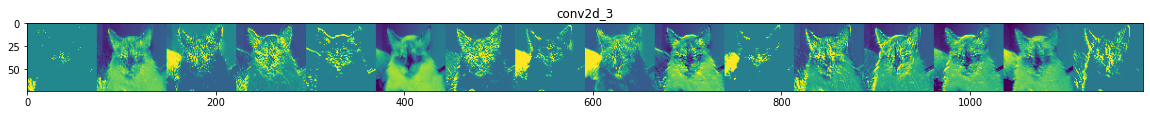

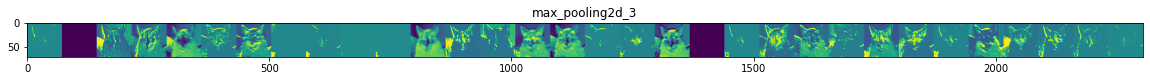

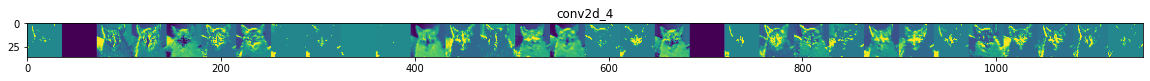

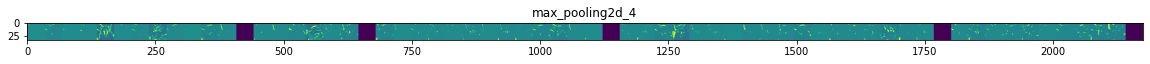

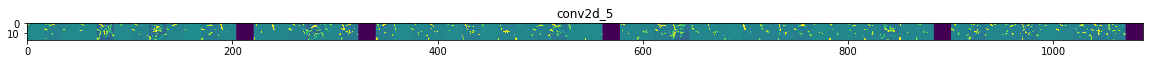

In [33]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 